<a href="https://colab.research.google.com/github/anushan1989/Fake_News_Detection/blob/main/Fake_News_Detection_Anusha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fake News Detection




## Objective


The objective of this assignment is to develop a Semantic Classification model. You will be using Word2Vec method to extract the semantic relations from the text and develop a basic understanding of how to train supervised models to categorise text based on its meaning, rather than just syntax. You will explore how this technique is used in situations where understanding textual meaning plays a critical role in making accurate and efficient decisions.


## Business Objective

The spread of fake news has become a significant challenge in today’s digital world. With the massive volume of news articles published daily, it’s becoming harder to distinguish between credible and misleading information. This creates a need for systems that can automatically classify news articles as true or fake, helping to reduce misinformation and protect public trust.


In this assignment, you will develop a Semantic Classification model that uses the Word2Vec method to detect recurring patterns and themes in news articles. Using supervised learning models, the goal is to build a system that classifies news articles as either fake or true.


<h2> Pipelines that needs to be performed </h2>

You need to perform the following tasks to complete the assignment:

<ol type="1">

  <li> Data Preparation
  <li> Text Preprocessing
  <li> Train Validation Split
  <li> EDA on Training Data
  <li> EDA on Validation Data [Optional]
  <li> Feature Extraction
  <li> Model Training and Evaluation

</ol>

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Dictionary


For this assignment, you will work with two datasets, `True.csv` and `Fake.csv`.
Both datasets contain three columns:
<ul>
  <li> title of the news article
  <li> text of the news article
  <li> date of article publication
</ul>

`True.csv` dataset includes 21,417 true news, while the `Fake.csv` dataset comprises 23,502 fake news.

## Installing required Libraries

## Importing the necessary libraries

In [ ]:
# Import essential libraries for data manipulation and analysis
import numpy as np  # For numerical operations and arrays
import pandas as pd  # For working with dataframes and structured data
import re  # For regular expression operations (text processing)
import nltk  # Natural Language Toolkit for text processing
import spacy  # For advanced NLP tasks
import string  # For handling string-related operations

# Optional: Uncomment the line below to enable GPU support for spaCy (if you have a compatible GPU)
#spacy.require_gpu()

# Load the spaCy small English language model
nlp = spacy.load("en_core_web_sm")

# For data visualization
import seaborn as sns  # Data visualization library for statistical graphics
import matplotlib.pyplot as plt  # Matplotlib for creating static plots
# Configure Matplotlib to display plots inline in Jupyter Notebook
%matplotlib inline

# Suppress unnecessary warnings to keep output clean
import warnings
warnings.filterwarnings('ignore')

# For interactive plots
from plotly.offline import plot  # Enables offline plotting with Plotly
import plotly.graph_objects as go  # For creating customizable Plotly plots
import plotly.express as px  # A high-level interface for Plotly

# For preprocessing and feature extraction in machine learning
from sklearn.feature_extraction.text import (  # Methods for text vectorization
    CountVectorizer,  # Converts text into a bag-of-words model
)

# Import accuracy, precision, recall, f_score from sklearn to predict train accuracy
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Pretty printing for better readability of output
from pprint import pprint

# For progress tracking in loops (useful for larger datasets)
from tqdm import tqdm, tqdm_notebook  # Progress bar for loops
tqdm.pandas()  # Enables progress bars for pandas operations


In [ ]:
## Change the display properties of pandas to max
#pd.set_option('display.max_colwidth', None)
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

## Load the data

Load the True.csv and Fake.csv files as DataFrames

In [ ]:
# Import the first file - True.csv
true_df = pd.read_csv('/content/True.csv')
# Import the second file - Fake.csv
fake_df = pd.read_csv('/content/Fake.csv')


## **1.** Data Preparation  <font color = red>[10 marks]</font>





### **1.0** Data Understanding

In [ ]:
# Inspect the DataFrame with True News to understand the given data
true_df.head()
# Get basic information about the dataset
true_df.info()

# Check for missing values
true_df.isnull().sum()

# Get summary statistics for numerical columns (if any)
true_df.describe()

# Check column names
true_df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   21417 non-null  object
 1   text    21417 non-null  object
 2   date    21417 non-null  object
dtypes: object(3)
memory usage: 502.1+ KB


Index(['title', 'text', 'date'], dtype='object')

In [ ]:
# Inspect the DataFrame with Fake News to understand the given data
fake_df.head()

,title,text,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...","December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...","December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,"December 25, 2017"


In [ ]:
# Basic info about the DataFrame (column types, non-null counts)
fake_df.info()

# Check for missing values
fake_df.isnull().sum()

# Summary statistics (mainly for numeric columns, if any)
fake_df.describe()

# Display column names
fake_df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23523 entries, 0 to 23522
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   23502 non-null  object
 1   text    23502 non-null  object
 2   date    23481 non-null  object
dtypes: object(3)
memory usage: 551.4+ KB


Index(['title', 'text', 'date'], dtype='object')

In [ ]:
# Print the column details for Fake News Dataframe
print(fake_df.columns)

Index(['title', 'text', 'date'], dtype='object')


In [ ]:
# Print the column names of both DataFrames
list(fake_df.columns)

['title', 'text', 'date']

### **1.1** Add new column  <font color = red>[3 marks]</font> <br>

Add new column `news_label` to both the DataFrames and assign labels

In [ ]:
# Add a new column 'news_label' to the true news DataFrame and assign the label "1" to indicate that these news are true
true_df['news_label'] = 1

fake_df['news_label'] = 0
# Add a new column 'news_label' to the fake news DataFrame and assign the label "0" to indicate that these news are fake


### **1.2** Merge DataFrames  <font color = red>[2 marks]</font> <br>

Create a new Dataframe by merging True and Fake DataFrames

In [ ]:
# Combine the true and fake news DataFrames into a single DataFrame
news_df = pd.concat([true_df, fake_df], ignore_index=True)

# Optional: Display the shape of the combined DataFrame
print("Combined DataFrame shape:", news_df.shape)

# Optional: Preview the first few rows
news_df.head()

Combined DataFrame shape: (44940, 4)


,title,text,date,news_label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,"December 29, 2017",1


In [ ]:
# Display the first 5 rows of the combined DataFrame to verify the result
news_df.head()

,title,text,date,news_label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,"December 29, 2017",1


### **1.3** Handle the null values  <font color = red>[2 marks]</font> <br>

Check for null values and handle it by imputation or dropping the null values

In [ ]:
# Check Presence of Null Values
news_df.isnull().sum()

,0
title,21
text,21
date,42
news_label,0


In [ ]:
# Handle Rows with Null Values
# Drop rows with any null values
news_df.dropna(inplace=True)

# Verify that there are no more nulls
print("Null values after dropping:", news_df.isnull().sum())

Null values after dropping: title         0
text          0
date          0
news_label    0
dtype: int64


### **1.4** Merge the relevant columns and drop the rest from the DataFrame  <font color = red>[3 marks]</font> <br>

Combine the relevant columns into a new column `news_text` and then drop irrelevant columns from the DataFrame

In [ ]:
# Combine the relevant columns into a new column 'news_text' by joining their values with a space
news_df['news_text'] = news_df['title'].fillna('') + ' ' + news_df['text'].fillna('')


In [ ]:


# Drop the irrelevant columns from the DataFrame as they are no longer needed
news_df = news_df.drop(columns=['title', 'text'])

# Display the first 5 rows of the updated DataFrame to check the result
print(news_df.head())

                 date  news_label  \
0  December 31, 2017            1   
1  December 29, 2017            1   
2  December 31, 2017            1   
3  December 30, 2017            1   
4  December 29, 2017            1   

                                           news_text  
0  As U.S. budget fight looms, Republicans flip t...  
1  U.S. military to accept transgender recruits o...  
2  Senior U.S. Republican senator: 'Let Mr. Muell...  
3  FBI Russia probe helped by Australian diplomat...  
4  Trump wants Postal Service to charge 'much mor...  


## **2.** Text Preprocessing <font color = red>[15 marks]</font> <br>






On all the news text, you need to:
<ol type=1>
  <li> Make the text lowercase
  <li> Remove text in square brackets
  <li> Remove punctuation
  <li> Remove words containing numbers
</ol>


Once you have done these cleaning operations you need to perform POS tagging and lemmatization on the cleaned news text, and remove all words that are not tagged as NN or NNS.

### **2.1** Text Cleaning  <font color = red>[5 marks]</font> <br>



#### 2.1.0 Create a new DataFrame to store the processed data



In [ ]:
# Create a DataFrame('df_clean') that will have only the cleaned news text and the lemmatized news text with POS tags removed
# Start by creating a copy of the 'news_text' and 'news_label' columns from news_df
df_clean = news_df[['news_text', 'news_label']].copy()

# Add 'news_label' column to the new dataframe for topic identification
# This was already done by selecting the column above, but we explicitly mention it here
# df_clean['news_label'] is already present

# Display the first few rows of the new DataFrame to verify
print(df_clean.head())

# Display the info of the new DataFrame
print(df_clean.info())


                                           news_text  news_label
0  As U.S. budget fight looms, Republicans flip t...           1
1  U.S. military to accept transgender recruits o...           1
2  Senior U.S. Republican senator: 'Let Mr. Muell...           1
3  FBI Russia probe helped by Australian diplomat...           1
4  Trump wants Postal Service to charge 'much mor...           1
<class 'pandas.core.frame.DataFrame'>
Index: 44898 entries, 0 to 44939
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   news_text   44898 non-null  object
 1   news_label  44898 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.0+ MB
None


#### 2.1.1 Write the function to clean the text and remove all the unnecessary elements  <font color = red>[4 marks]</font> <br>



In [ ]:
# Write the function here to clean the text and remove all the unnecessary elements
import re
def clean_text(text):
    # Convert to lower case
    text = text.lower()

    # Remove text in square brackets
    text = re.sub('\[.*?\]', '', text)

    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation

   # text = re.sub('[%s]' % re.escape(string.punctuation), '', text)

    # Remove words with numbers
    text = re.sub('\w*\d\w*', '', text)

    # Remove newline characters
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces

    text = re.sub('\n', '', text)

    return text

#### 2.1.2  Apply the function to clean the news text and store the cleaned text in a new column within the new DataFrame. <font color = red>[1 mark]</font> <br>


In [ ]:
# Apply the function to clean the news text and remove all unnecessary elements
# Store it in a separate column in the new DataFrame

df_clean['cleaned_text'] = df_clean['news_text'].apply(clean_text)

# Display the first few rows to verify the new column
print(df_clean.head())

# Display info to see the new column and its data type
print(df_clean.info())

print(df_clean[['news_text', 'cleaned_text']].head())

                                           news_text  news_label  \
0  As U.S. budget fight looms, Republicans flip t...           1   
1  U.S. military to accept transgender recruits o...           1   
2  Senior U.S. Republican senator: 'Let Mr. Muell...           1   
3  FBI Russia probe helped by Australian diplomat...           1   
4  Trump wants Postal Service to charge 'much mor...           1   

                                        cleaned_text  
0  as us budget fight looms republicans flip thei...  
1  us military to accept transgender recruits on ...  
2  senior us republican senator let mr mueller do...  
3  fbi russia probe helped by australian diplomat...  
4  trump wants postal service to charge much more...  
<class 'pandas.core.frame.DataFrame'>
Index: 44898 entries, 0 to 44939
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   news_text     44898 non-null  object
 1   news_label    44898 non-nul

### **2.2** POS Tagging and Lemmatization  <font color = red>[10 marks]</font> <br>



#### 2.2.1 Write the function for POS tagging and lemmatization, filtering stopwords and keeping only NN and NNS tags <font color = red>[8 marks]</font> <br>



In [ ]:
# Write the function for POS tagging and lemmatization, filtering stopwords and keeping only NN and NNS tags
import spacy

# Load SpaCy English model (disable parser & NER for speed)
nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])

def pos_lemmatize_filter(text):
    """
    Performs POS tagging, lemmatization, stopword removal, and filters to keep only nouns (NN/NNS).

    Args:
        text (str): The input text to process.

    Returns:
        str: A string containing the lemmatized nouns, joined by spaces.
    """
    doc = nlp(text)
    processed_tokens = []
    for token in doc:
        # Check if the token is not a stopword and its POS tag is 'NOUN'
        # SpaCy's 'NOUN' tag covers both singular (NN) and plural (NNS) nouns
        if not token.is_stop and token.pos_ == 'NOUN':
            processed_tokens.append(token.lemma_) # Append the lemmatized form

    return " ".join(processed_tokens)

#### 2.2.2  Apply the POS tagging and lemmatization function to cleaned text and store it in a new column within the new DataFrame. <font color = red>[2 mark]</font> <br>

**NOTE: Store the cleaned text and the lemmatized text with POS tags removed in separate columns within the new DataFrame.**

**This will be useful for analysing character length differences between cleaned text and lemmatized text with POS tags removed during EDA.**


In [ ]:
# Apply POS tagging and lemmatization function to cleaned text
# Store it in a separate column in the new DataFrame

#df_clean['lemmatized_text'] = df_clean['cleaned_text'].apply(pos_lemmatize_filter)

# Display the first few rows to verify the new column
#print(df_clean.head())

# Display info to see the new column and its data type
#print(df_clean.info())

from tqdm.auto import tqdm
tqdm.pandas() # Initialize tqdm for pandas

print("Applying POS tagging and lemmatization. This may take some time...")
df_clean['lemmatized_text'] = df_clean['cleaned_text'].progress_apply(pos_lemmatize_filter)
print("POS tagging and lemmatization complete.")



Applying POS tagging and lemmatization. This may take some time...


  0%|          | 0/44898 [00:00<?, ?it/s]

POS tagging and lemmatization complete.


### Save the Cleaned data as a csv file (Recommended)

In [ ]:
## Recommended to perform the below steps to save time while rerunning the code
df_clean.to_csv("clean_df.csv", index=False)
df_clean = pd.read_csv("clean_df.csv")

In [ ]:
# Check the first few rows of the DataFrame
print(df_clean.head())

                                           news_text  news_label  \
0  As U.S. budget fight looms, Republicans flip t...           1   
1  U.S. military to accept transgender recruits o...           1   
2  Senior U.S. Republican senator: 'Let Mr. Muell...           1   
3  FBI Russia probe helped by Australian diplomat...           1   
4  Trump wants Postal Service to charge 'much mor...           1   

                                        cleaned_text  \
0  as us budget fight looms republicans flip thei...   
1  us military to accept transgender recruits on ...   
2  senior us republican senator let mr mueller do...   
3  fbi russia probe helped by australian diplomat...   
4  trump wants postal service to charge much more...   

                                     lemmatized_text  
0  budget fight script head faction month expansi...  
1  military transgender recruit people time milit...  
2  job counsel investigation link election campai...  
3  probe diplomat trump campaign a

In [ ]:
# Check the dimensions of the DataFrame
print(df_clean.shape)

(44898, 4)


In [ ]:
# Check the number of non-null entries and data types of each column
print(df_clean.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   news_text        44898 non-null  object
 1   news_label       44898 non-null  int64 
 2   cleaned_text     44889 non-null  object
 3   lemmatized_text  44877 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.4+ MB
None


## **3.** Train Validation Split <font color = red>[5 marks]</font> <br>

In [ ]:
# Import Train Test Split and split the DataFrame into 70% train and 30% validation data

from sklearn.model_selection import train_test_split

# Split the DataFrame into training (70%) and validation (30%) sets
# Stratify by 'news_label' to maintain the proportion of true/fake news in both sets
train_df, val_df = train_test_split(df_clean, test_size=0.3, random_state=42, stratify=df_clean['news_label'])

# Display the shapes of the resulting dataframes to verify the split
print("Training DataFrame shape:", train_df.shape)
print("Validation DataFrame shape:", val_df.shape)

# Optional: Check the distribution of news_label in both sets
print("\nTraining set label distribution:")
print(train_df['news_label'].value_counts(normalize=True))
print("\nValidation set label distribution:")
print(val_df['news_label'].value_counts(normalize=True))

Training DataFrame shape: (31428, 4)
Validation DataFrame shape: (13470, 4)

Training set label distribution:
news_label
0    0.522973
1    0.477027
Name: proportion, dtype: float64

Validation set label distribution:
news_label
0    0.523014
1    0.476986
Name: proportion, dtype: float64


## **4.** Exploratory Data Analysis on Training Data  <font color = red>[40 marks]</font> <br>

Perform EDA on cleaned and preprocessed texts to get familiar with the training data by performing the tasks given below:

<ul>
  <li> Visualise the training data according to the character length of cleaned news text and lemmatized news text with POS tags removed
  <li> Using a word cloud, find the top 40 words by frequency in true and fake news separately
  <li> Find the top unigrams, bigrams and trigrams by frequency in true and fake news separately
</ul>





### **4.1** Visualise character lengths of cleaned news text and lemmatized news text with POS tags removed  <font color = red>[10 marks]</font> <br>



##### 4.1.1  Add new columns to calculate the character lengths of the processed data columns  <font color = red>[3 marks]</font> <br>



In [ ]:
# Add a new column to calculate the character length of cleaned news text

train_df['cleaned_text_length'] = train_df['cleaned_text'].str.len()

# Add a new column to calculate the character length of lemmatized news text with POS tags removed
train_df['lemmatized_text_length'] = train_df['lemmatized_text'].str.len()

# Display the first few rows to verify the new columns
print(train_df.head())

                                               news_text  news_label  \
32218  FANTASTIC! TRUMP BUDGET DIRECTOR Rips Into Rep...           0   
24542   Trump Just Got Ripped To SHREDS After Blaming...           0   
38058  GLOBAL CLIMATE CHANGE LIARS Ignore Truth About...           0   
40508  WILL VILE LEFTISTS Turn Democrats Away?…WATCH ...           0   
11158  No-confidence vote against Pennsylvania approv...           1   

                                            cleaned_text  \
32218  fantastic trump budget director rips into repo...   
24542  trump just got ripped to shreds after blaming ...   
38058  global climate change liars ignore truth about...   
40508  will vile leftists turn democrats awaywatch an...   
11158  noconfidence vote against pennsylvania approve...   

                                         lemmatized_text  cleaned_text_length  \
32218  trump budget director rip reporter cut thing a...                696.0   
24542  trump shred democrat russias election

##### 4.1.2  Create Histogram to visualise character lengths  <font color = red>[7 marks]</font> <br>

 Plot both distributions on the same graph for comparison and to observe overlaps and peak differences to understand text preprocessing's impact on text length.

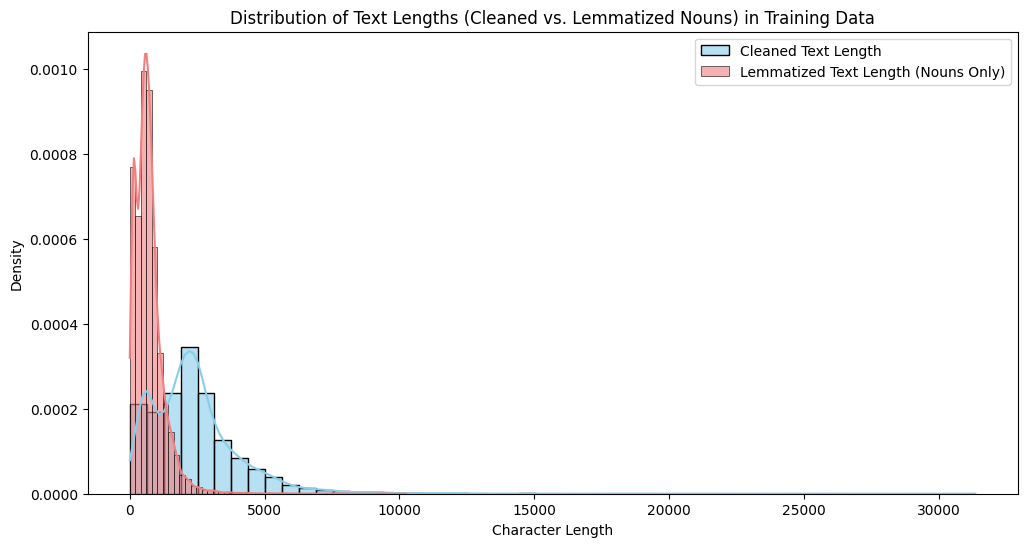

In [ ]:
# Create a histogram plot to visualise character lengths

plt.figure(figsize=(12, 6)) # Set the figure size for better readability

# Add histogram for cleaned news text
sns.histplot(train_df['cleaned_text_length'], color='skyblue', label='Cleaned Text Length', kde=True, stat='density', alpha=0.6, bins=50)

# Add histogram for lemmatized news text with POS tags removed
sns.histplot(train_df['lemmatized_text_length'], color='lightcoral', label='Lemmatized Text Length (Nouns Only)', kde=True, stat='density', alpha=0.6, bins=50)

# Add title and labels
plt.title('Distribution of Text Lengths (Cleaned vs. Lemmatized Nouns) in Training Data')
plt.xlabel('Character Length')
plt.ylabel('Density')
plt.legend() # Show the legend to identify the histograms

# Show the plot
plt.show()


### **4.2** Find and display the top 40 words by frequency among true and fake news in Training data after processing the text  <font color = red>[10 marks]</font> <br>



##### 4.2.1 Find and display the top 40 words by frequency among true news in Training data after processing the text  <font color = red>[5 marks]</font> <br>

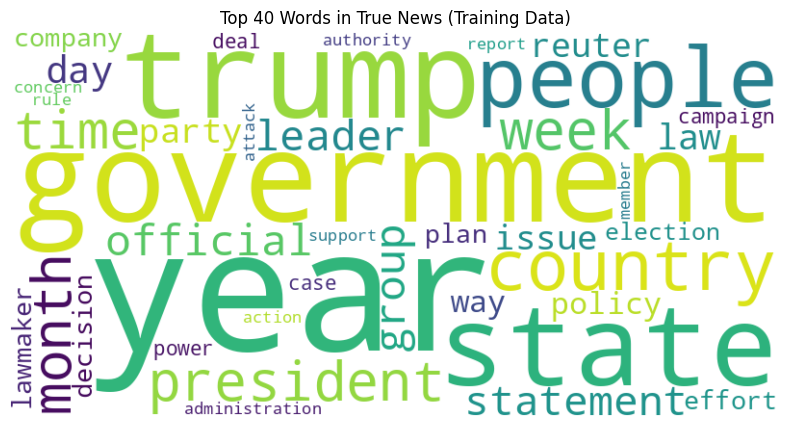

In [ ]:
# Import WordCloud
!pip install wordcloud
from wordcloud import WordCloud

# Filter news with label 1 (True News) and convert to it string and handle any non-string values
true_news_text = train_df[train_df['news_label'] == 1]['lemmatized_text'].astype(str).str.cat(sep=' ')

# Generate word cloud for True News
wordcloud_true = WordCloud(width=800, height=400, background_color='white', max_words=40).generate(true_news_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_true, interpolation='bilinear')
plt.axis('off')
plt.title('Top 40 Words in True News (Training Data)')
plt.show()

##### 4.2.2 Find and display the top 40 words by frequency among fake news in Training data after processing the text  <font color = red>[5 marks]</font> <br>

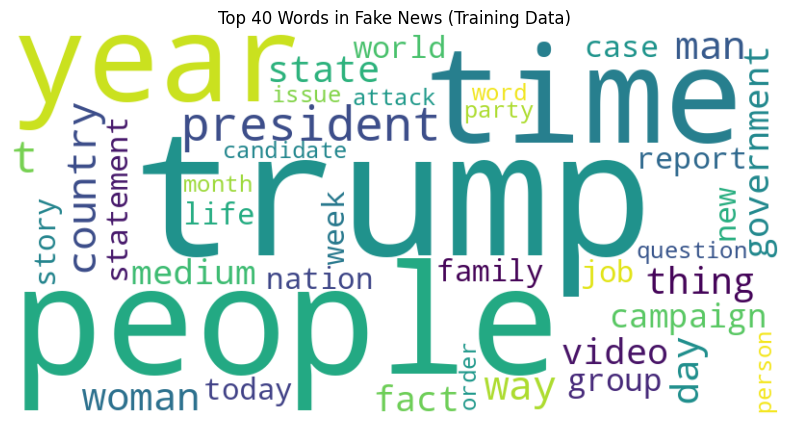

In [ ]:
## Use a word cloud find the top 40 words by frequency among fake news in the training data after processing the text

# Filter news with label 0 (Fake News) and convert to it string and handle any non-string values
fake_news_text = train_df[train_df['news_label'] == 0]['lemmatized_text'].astype(str).str.cat(sep=' ')

# Generate word cloud for Fake News
wordcloud_fake = WordCloud(width=800, height=400, background_color='white', max_words=40).generate(fake_news_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.axis('off')
plt.title('Top 40 Words in Fake News (Training Data)')
plt.show()

### **4.3** Find and display the top unigrams, bigrams and trigrams by frequency in true news and fake news after processing the text  <font color = red>[20 marks]</font> <br>




##### 4.3.1 Write a function to get the specified top n-grams  <font color = red>[4 marks]</font> <br>



In [ ]:
# Write a function to get the specified top n-grams
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter

def get_top_ngrams(corpus, ngram_range, n=10):
    """
    Extracts and counts the top n n-grams from a corpus.

    Args:
        corpus (list): A list of text documents (strings).
        ngram_range (tuple): The range of n-gram sizes (e.g., (1, 1) for unigrams, (2, 2) for bigrams).
        n (int): The number of top n-grams to return.

    Returns:
        list: A list of tuples, where each tuple contains an n-gram and its frequency,
              sorted in descending order of frequency.
    """
    # Initialize CountVectorizer to get n-grams
    vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words='english') # stop_words can be adjusted if needed

    # Fit and transform the corpus
    X = vectorizer.fit_transform(corpus)

    # Get feature names (the n-grams)
    feature_names = vectorizer.get_feature_names_out()

    # Sum frequencies of each n-gram across all documents
    ngram_counts = X.sum(axis=0)

    # Create a dictionary of n-grams and their counts
    ngram_freq = [(feature_names[i], ngram_counts[0, i]) for i in range(ngram_counts.shape[1])]

    # Sort by frequency and get the top n
    top_ngrams = sorted(ngram_freq, key=lambda x: x[1], reverse=True)[:n]

    return top_ngrams

##### 4.3.2 Handle the NaN values  <font color = red>[1 mark]</font> <br>



In [ ]:
# Handle NaN values in the text data

# Fill NaN values in the 'lemmatized_text' column with empty strings
train_df['lemmatized_text'].fillna('', inplace=True)

# Verify that there are no more NaNs in this column
print("Null values in 'lemmatized_text' after handling:", train_df['lemmatized_text'].isnull().sum())


Null values in 'lemmatized_text' after handling: 0


### For True News




##### 4.3.3 Display the top 10 unigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>

Top 10 Unigrams in True News:
trump: 28822
state: 14105
government: 13917
year: 13185
people: 10895
election: 9905
country: 9432
official: 9363
party: 8155
president: 8095


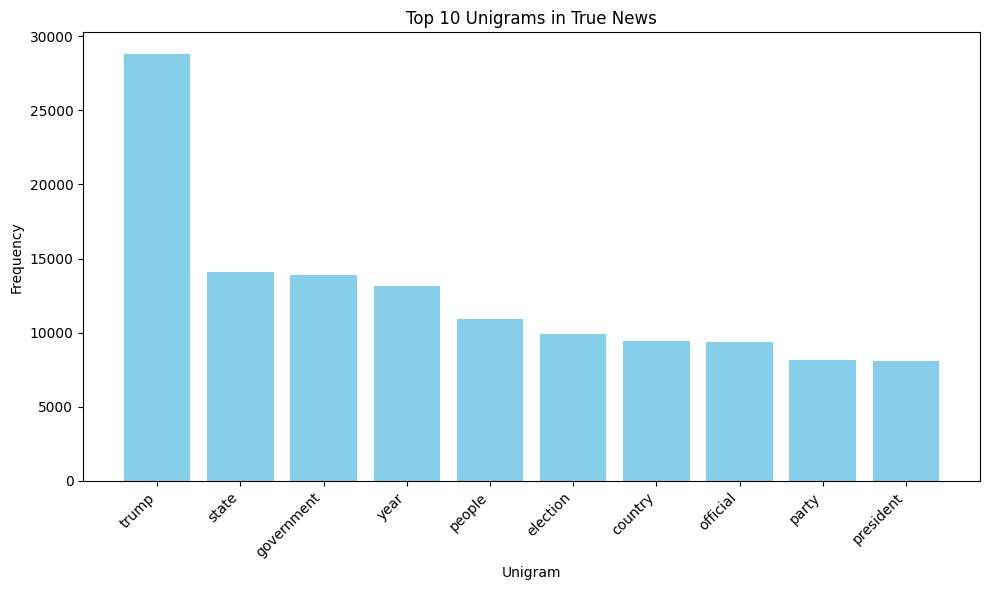

In [ ]:
# Print the top 10 unigrams by frequency in true news and plot the same using a bar graph

# Filter for true news and get the lemmatized text
true_news_corpus = train_df[train_df['news_label'] == 1]['lemmatized_text'].tolist()

# Get the top 10 unigrams
top_unigrams_true = get_top_ngrams(true_news_corpus, ngram_range=(1, 1), n=10)

# Print the top unigrams
print("Top 10 Unigrams in True News:")
for ngram, freq in top_unigrams_true:
    print(f"{ngram}: {freq}")

# Prepare data for plotting
ngrams, frequencies = zip(*top_unigrams_true)

# Create the bar graph
plt.figure(figsize=(10, 6))
plt.bar(ngrams, frequencies, color='skyblue')
plt.xlabel('Unigram')
plt.ylabel('Frequency')
plt.title('Top 10 Unigrams in True News')
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

##### 4.3.4 Display the top 10 bigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



Top 10 Bigrams in True News:
trump administration: 1334
trump campaign: 1295
news conference: 955
security force: 721
request comment: 709
tax reform: 705
climate change: 674
house representative: 666
attorney general: 627
intelligence agency: 624


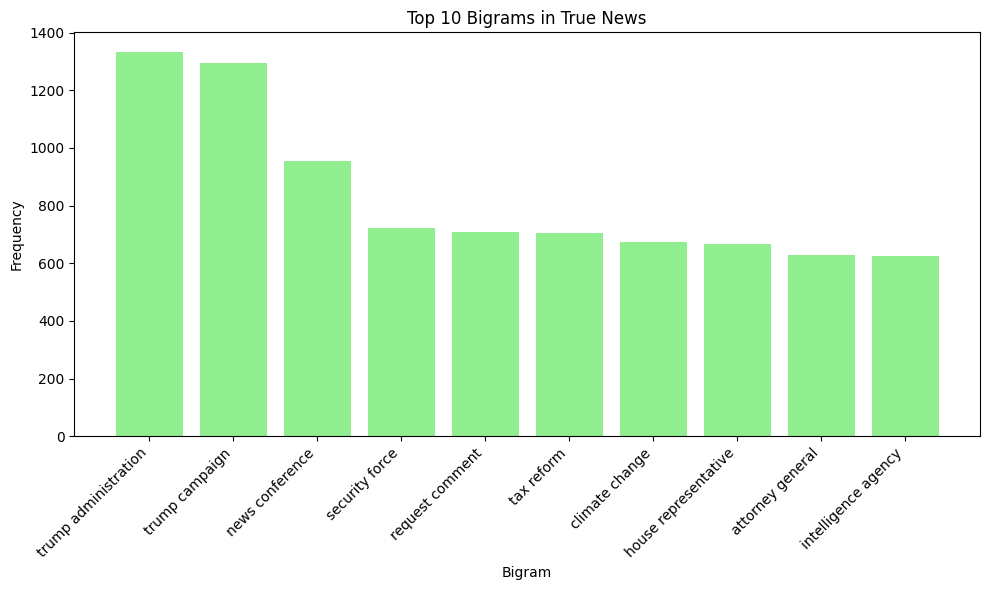

In [ ]:
# Print the top 10 bigrams by frequency in true news and plot the same using a bar graph

# Filter for true news and get the lemmatized text
true_news_corpus = train_df[train_df['news_label'] == 1]['lemmatized_text'].tolist()

# Get the top 10 bigrams
top_bigrams_true = get_top_ngrams(true_news_corpus, ngram_range=(2, 2), n=10)

# Print the top bigrams
print("Top 10 Bigrams in True News:")
for ngram, freq in top_bigrams_true:
    print(f"{ngram}: {freq}")

# Prepare data for plotting
ngrams, frequencies = zip(*top_bigrams_true)

# Create the bar graph
plt.figure(figsize=(10, 6))
plt.bar(ngrams, frequencies, color='lightgreen')
plt.xlabel('Bigram')
plt.ylabel('Frequency')
plt.title('Top 10 Bigrams in True News')
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

##### 4.3.5 Display the top 10 trigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



Top 10 Trigrams in True News:
official condition anonymity: 244
candidate donald trump: 190
trump transition team: 188
tax rate percent: 145
article sap editorial: 122
editorial staff sap: 122
involvement creation production: 122
sap editorial staff: 122
sap involvement creation: 122
staff sap involvement: 122


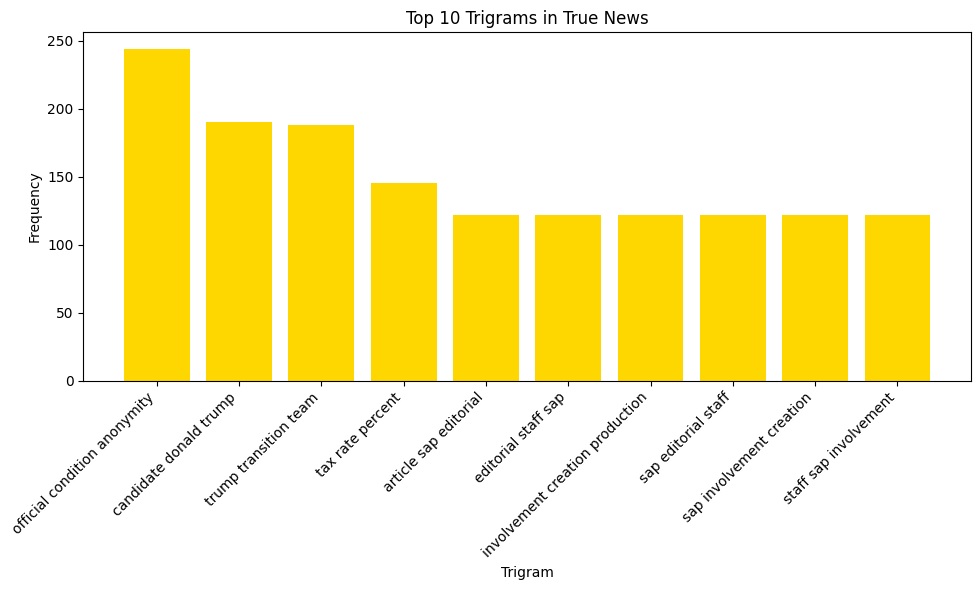

In [ ]:
# Print the top 10 trigrams by frequency in true news and plot the same using a bar graph

# Filter for true news and get the lemmatized text
true_news_corpus = train_df[train_df['news_label'] == 1]['lemmatized_text'].tolist()

# Get the top 10 trigrams
top_trigrams_true = get_top_ngrams(true_news_corpus, ngram_range=(3, 3), n=10)

# Print the top trigrams
print("Top 10 Trigrams in True News:")
for ngram, freq in top_trigrams_true:
    print(f"{ngram}: {freq}")

# Prepare data for plotting
ngrams, frequencies = zip(*top_trigrams_true)

# Create the bar graph
plt.figure(figsize=(10, 6))
plt.bar(ngrams, frequencies, color='gold')
plt.xlabel('Trigram')
plt.ylabel('Frequency')
plt.title('Top 10 Trigrams in True News')
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

### For Fake News







##### 4.3.6 Display the top 10 unigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>

Top 10 Unigrams in Fake News:
trump: 40864
people: 18249
president: 11521
time: 11118
year: 10277
image: 9716
state: 8694
woman: 8317
video: 7950
campaign: 7683


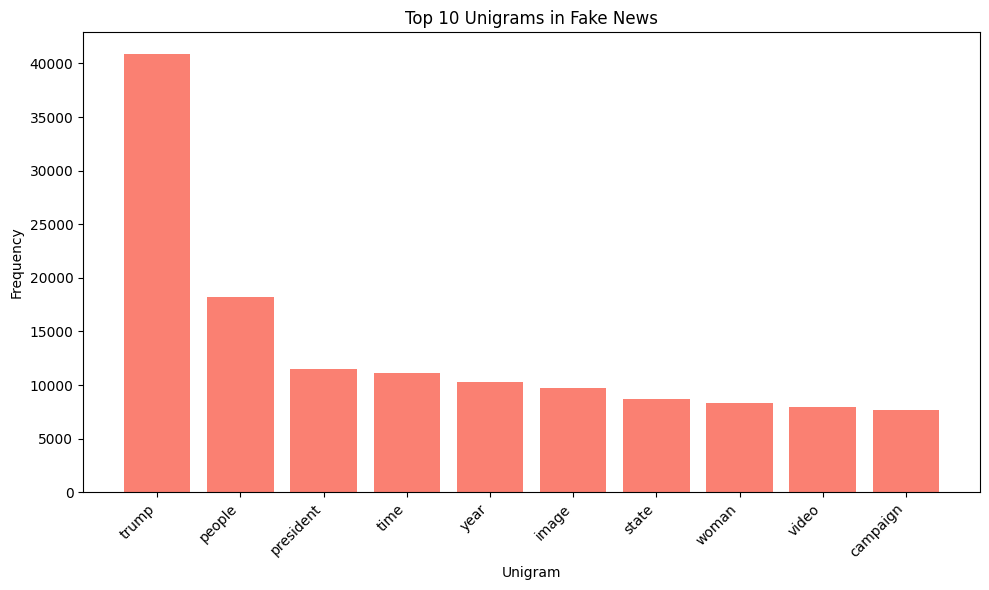

In [ ]:
# Print the top 10 unigrams by frequency in fake news and plot the same using a bar graph

# Filter for fake news and get the lemmatized text
fake_news_corpus = train_df[train_df['news_label'] == 0]['lemmatized_text'].tolist()

# Get the top 10 unigrams
top_unigrams_fake = get_top_ngrams(fake_news_corpus, ngram_range=(1, 1), n=10)

# Print the top unigrams
print("Top 10 Unigrams in Fake News:")
for ngram, freq in top_unigrams_fake:
    print(f"{ngram}: {freq}")

# Prepare data for plotting
ngrams, frequencies = zip(*top_unigrams_fake)

# Create the bar graph
plt.figure(figsize=(10, 6))
plt.bar(ngrams, frequencies, color='salmon')
plt.xlabel('Unigram')
plt.ylabel('Frequency')
plt.title('Top 10 Unigrams in Fake News')
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

##### 4.3.7 Display the top 10 bigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



Top 10 Bigrams in Fake News:
trump supporter: 1522
president trump: 1248
trump campaign: 1236
image image: 1193
century wire: 1188
police officer: 1157
law enforcement: 1070
donald trump: 998
screen capture: 925
climate change: 782


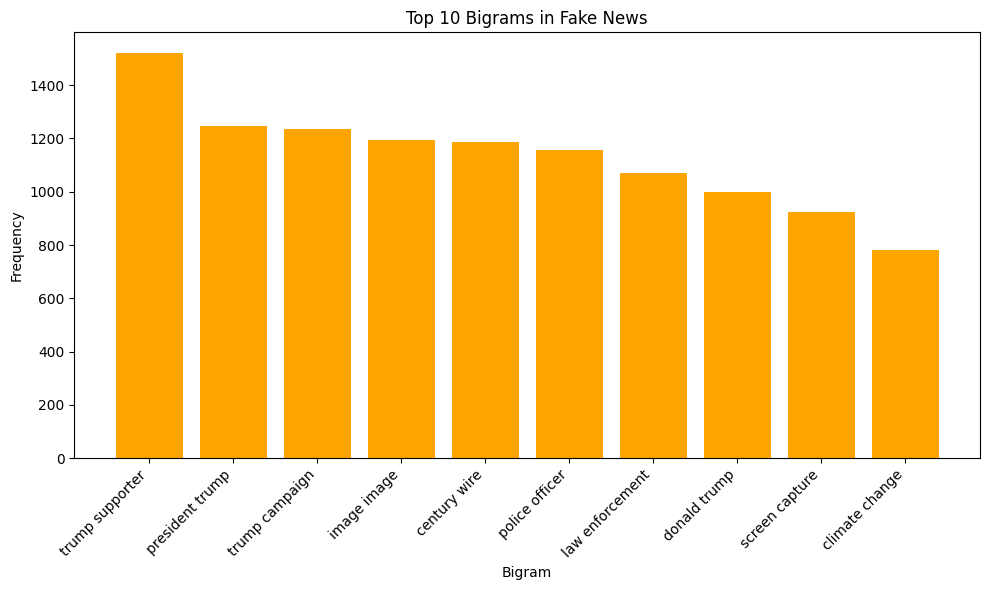

In [ ]:
# Print the top 10 bigrams by frequency in fake news and plot the same using a bar graph

# Filter for fake news and get the lemmatized text
fake_news_corpus = train_df[train_df['news_label'] == 0]['lemmatized_text'].tolist()

# Get the top 10 bigrams
top_bigrams_fake = get_top_ngrams(fake_news_corpus, ngram_range=(2, 2), n=10)

# Print the top bigrams
print("Top 10 Bigrams in Fake News:")
for ngram, freq in top_bigrams_fake:
    print(f"{ngram}: {freq}")

# Prepare data for plotting
ngrams, frequencies = zip(*top_bigrams_fake)

# Create the bar graph
plt.figure(figsize=(10, 6))
plt.bar(ngrams, frequencies, color='orange') # Using a different color for distinction
plt.xlabel('Bigram')
plt.ylabel('Frequency')
plt.title('Top 10 Bigrams in Fake News')
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

##### 4.3.8 Display the top 10 trigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



Top 10 Trigrams in Fake News:
news century wire: 556
video screen capture: 516
image video screen: 494
image screen capture: 309
image getty image: 301
filessupport subscribe member: 192
century wire filessupport: 191
image video screenshot: 165
law enforcement officer: 163
image chip image: 162


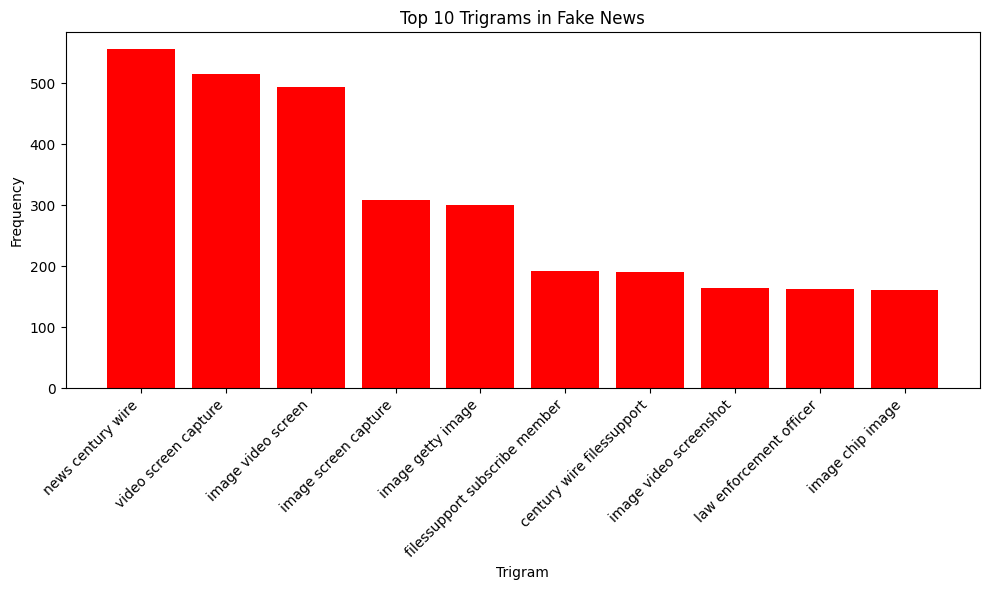

In [ ]:
# Print the top 10 trigrams by frequency in fake news and plot the same using a bar graph

# Filter for fake news and get the lemmatized text
fake_news_corpus = train_df[train_df['news_label'] == 0]['lemmatized_text'].tolist()

# Get the top 10 trigrams
top_trigrams_fake = get_top_ngrams(fake_news_corpus, ngram_range=(3, 3), n=10)

# Print the top trigrams
print("Top 10 Trigrams in Fake News:")
for ngram, freq in top_trigrams_fake:
    print(f"{ngram}: {freq}")

# Prepare data for plotting
ngrams, frequencies = zip(*top_trigrams_fake)

# Create the bar graph
plt.figure(figsize=(10, 6))
plt.bar(ngrams, frequencies, color='red') # Using a distinct color for fake news trigrams
plt.xlabel('Trigram')
plt.ylabel('Frequency')
plt.title('Top 10 Trigrams in Fake News')
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

## **5.** Exploratory Data Analysis on Validation Data [Optional]

Perform EDA on validation data to differentiate EDA on training data with EDA on validation data and the tasks are given below:

<ul>
  <li> Visualise the data according to the character length of cleaned news text and lemmatized text with POS tags removed
  <li> Using a word cloud find the top 40 words by frequency in true and fake news separately
  <li> Find the top unigrams, bigrams and trigrams by frequency in true and fake news separately
</ul>





### **5.1** Visualise character lengths of cleaned news text and lemmatized news text with POS tags removed

 5.1.1  Add new columns to calculate the character lengths of the processed data columns

In [ ]:
# Add a new column to calculate the character length of cleaned news text

val_df['cleaned_text_length'] = val_df['cleaned_text'].str.len()

# Add a new column to calculate the character length of lemmatized news text with POS tags removed
val_df['lemmatized_text_length'] = val_df['lemmatized_text'].str.len()

# Optional: Display the first few rows to verify the new columns in val_df
print("Validation DataFrame with length columns:")
print(val_df.head())

Validation DataFrame with length columns:
                                               news_text  news_label  \
35448  THE TRUTH ABOUT WHY HILLARY Is The Only Candid...           0   
15428  Liberia's president says 'our democracy is und...           1   
25568   WATCH: Wolf Blitzer SILENCES Trump Supporter’...           0   
7847   Russia's Putin says hard to hold dialogue with...           1   
41186  DEMOCRAT OPERATIVES Caught Planning To Bully W...           0   

                                            cleaned_text  \
35448  the truth about why hillary is the only candid...   
15428  liberias president says our democracy is under...   
25568  watch wolf blitzer silences trump supporters w...   
7847   russias putin says hard to hold dialogue with ...   
41186  democrat operatives caught planning to bully w...   

                                         lemmatized_text  cleaned_text_length  \
35448  truth candidate physician news obsession presi...               2886.0   
15

##### 5.1.2  Create Histogram to visualise character lengths

Plot both distributions on the same graph for comparison and to observe overlaps and peak differences to understand text preprocessing's impact on text length.

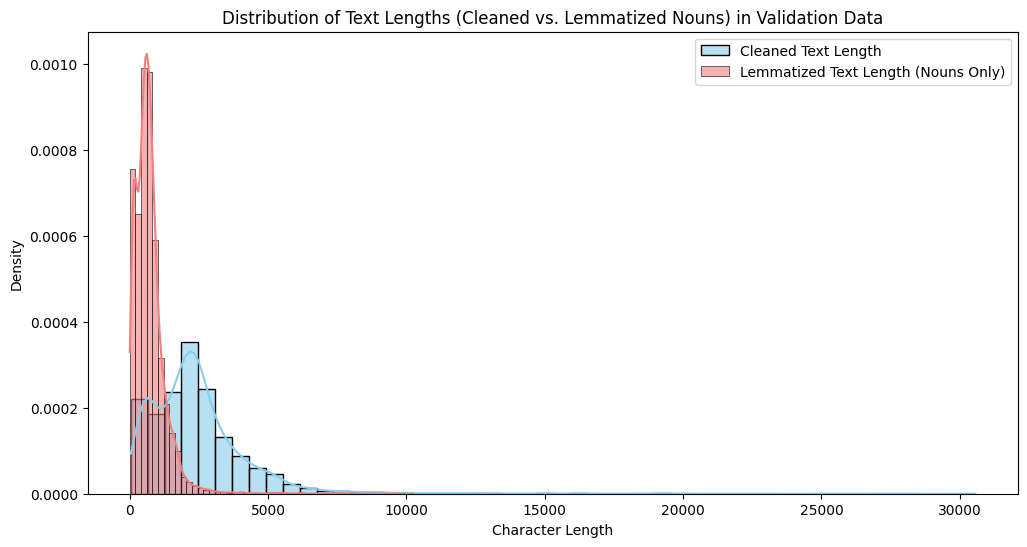

In [ ]:
# Create a histogram plot to visualise character lengths

plt.figure(figsize=(12, 6)) # Set the figure size

# Add histogram for cleaned news text
sns.histplot(val_df['cleaned_text_length'], color='skyblue', label='Cleaned Text Length', kde=True, stat='density', alpha=0.6, bins=50)

# Add histogram for lemmatized news text with POS tags removed
sns.histplot(val_df['lemmatized_text_length'], color='lightcoral', label='Lemmatized Text Length (Nouns Only)', kde=True, stat='density', alpha=0.6, bins=50)

# Add title and labels
plt.title('Distribution of Text Lengths (Cleaned vs. Lemmatized Nouns) in Validation Data')
plt.xlabel('Character Length')
plt.ylabel('Density')
plt.legend() # Show the legend

# Show the plot
plt.show()

### **5.2** Find and display the top 40 words by frequency among true and fake news after processing the text

##### 5.2.1  Find and display the top 40 words by frequency among true news in validation data after processing the text

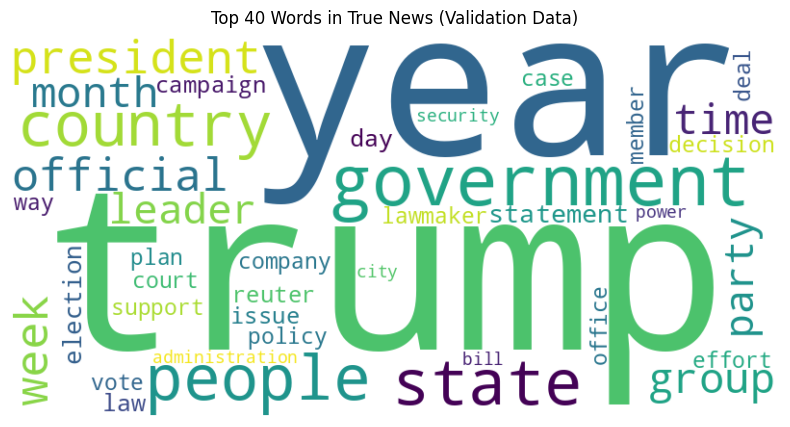

In [ ]:
## Use a word cloud find the top 40 words by frequency among true news after processing the text

# Generate word cloud for True News

# Filter news with label 1 (True News) in validation data
true_news_text_val = val_df[val_df['news_label'] == 1]['lemmatized_text'].astype(str).str.cat(sep=' ')

# Generate word cloud for True News in Validation Data
wordcloud_true_val = WordCloud(width=800, height=400, background_color='white', max_words=40).generate(true_news_text_val)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_true_val, interpolation='bilinear')
plt.axis('off')
plt.title('Top 40 Words in True News (Validation Data)')
plt.show()

##### 5.2.2  Find and display the top 40 words by frequency among fake news in validation data after processing the text

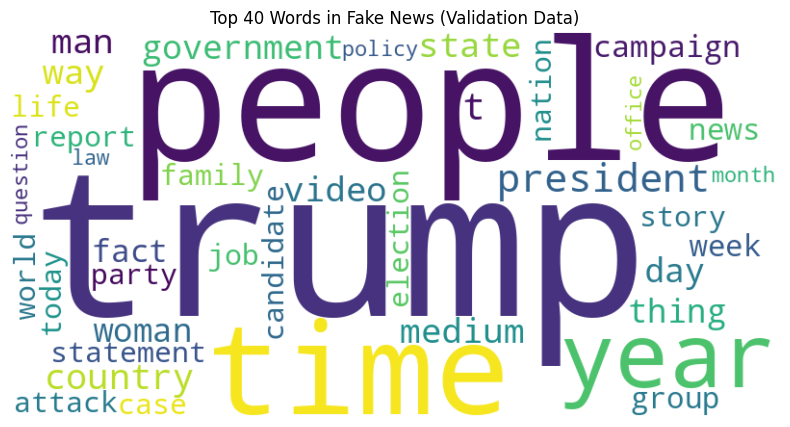

In [ ]:
## Use a word cloud find the top 40 words by frequency among fake news after processing the text

# Generate word cloud for Fake News
## Use a word cloud find the top 40 words by frequency among fake news after processing the text

# Filter news with label 0 (Fake News) in validation data
fake_news_text_val = val_df[val_df['news_label'] == 0]['lemmatized_text'].astype(str).str.cat(sep=' ')

# Generate word cloud for Fake News in Validation Data
wordcloud_fake_val = WordCloud(width=800, height=400, background_color='white', max_words=40).generate(fake_news_text_val)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_fake_val, interpolation='bilinear')
plt.axis('off')
plt.title('Top 40 Words in Fake News (Validation Data)')
plt.show()

### **5.3** Find and display the top unigrams, bigrams and trigrams by frequency in true news and fake news after processing the text  





##### 5.3.1 Write a function to get the specified top n-grams

In [ ]:
## Write a function to get the specified top n-grams
## Write a function to get the specified top n-grams
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter

def get_top_ngrams(corpus, ngram_range, n=10):
    """
    Extracts and counts the top n n-grams from a corpus.

    Args:
        corpus (list): A list of text documents (strings).
        ngram_range (tuple): The range of n-gram sizes (e.g., (1, 1) for unigrams, (2, 2) for bigrams).
        n (int): The number of top n-grams to return.

    Returns:
        list: A list of tuples, where each tuple contains an n-gram and its frequency,
              sorted in descending order of frequency.
    """
    # Initialize CountVectorizer to get n-grams
    vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words='english') # stop_words can be adjusted if needed

    # Fit and transform the corpus
    X = vectorizer.fit_transform(corpus)

    # Get feature names (the n-grams)
    feature_names = vectorizer.get_feature_names_out()

    # Sum frequencies of each n-gram across all documents
    ngram_counts = X.sum(axis=0)

    # Create a dictionary of n-grams and their counts
    ngram_freq = [(feature_names[i], ngram_counts[0, i]) for i in range(ngram_counts.shape[1])]

    # Sort by frequency and get the top n
    top_ngrams = sorted(ngram_freq, key=lambda x: x[1], reverse=True)[:n]

    return top_ngrams

##### 5.3.2 Handle the NaN values

In [ ]:
## First handle NaN values in the text data

# Fill NaN values in the 'lemmatized_text' column with empty strings for the validation data
val_df['lemmatized_text'].fillna('', inplace=True)

# Verify that there are no more NaNs in this column for validation data
print("Null values in 'lemmatized_text' in validation data after handling:", val_df['lemmatized_text'].isnull().sum())

Null values in 'lemmatized_text' in validation data after handling: 0


### For True News



##### 5.3.3 Display the top 10 unigrams by frequency in true news and plot them as a bar graph

Top 10 Unigrams in True News (Validation Data):
trump: 11850
state: 5988
government: 5908
year: 5778
people: 4490
election: 4400
country: 4076
official: 4011
party: 3874
president: 3438


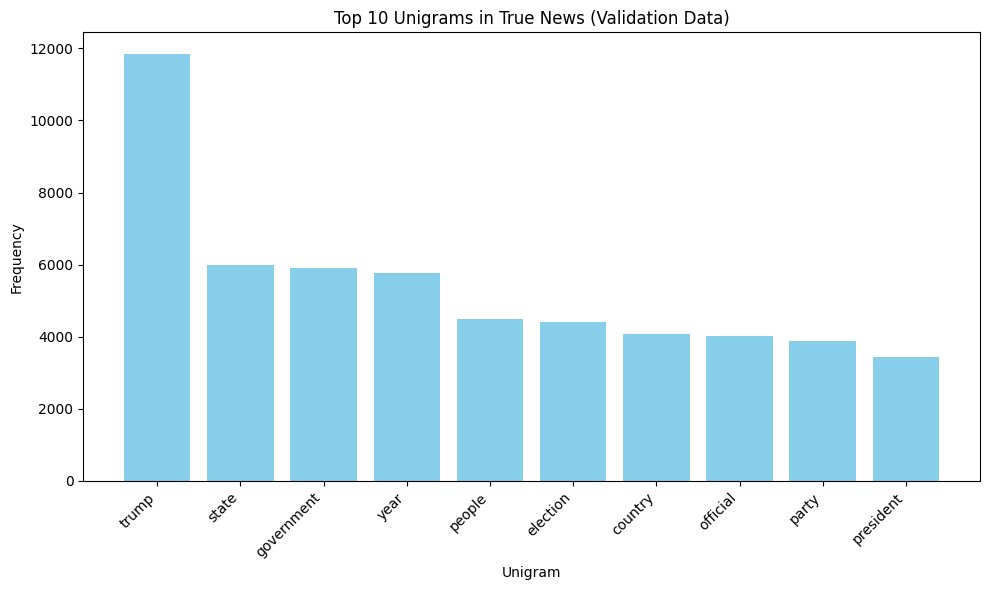

In [ ]:
## Print the top 10 unigrams by frequency in true news and plot the same using a bar graph

# Filter for true news in validation data and get the lemmatized text
true_news_corpus_val = val_df[val_df['news_label'] == 1]['lemmatized_text'].tolist()

# Get the top 10 unigrams for validation true news
top_unigrams_true_val = get_top_ngrams(true_news_corpus_val, ngram_range=(1, 1), n=10)

# Print the top unigrams
print("Top 10 Unigrams in True News (Validation Data):")
for ngram, freq in top_unigrams_true_val:
    print(f"{ngram}: {freq}")

# Prepare data for plotting
ngrams, frequencies = zip(*top_unigrams_true_val)

# Create the bar graph
plt.figure(figsize=(10, 6))
plt.bar(ngrams, frequencies, color='skyblue')
plt.xlabel('Unigram')
plt.ylabel('Frequency')
plt.title('Top 10 Unigrams in True News (Validation Data)')
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

##### 5.3.4 Display the top 10 bigrams by frequency in true news and plot them as a bar graph

Top 10 Bigrams in True News (Validation Data):
trump administration: 524
trump campaign: 470
news conference: 428
request comment: 315
tax reform: 315
climate change: 297
intelligence agency: 284
security force: 282
house representative: 277
attorney general: 258


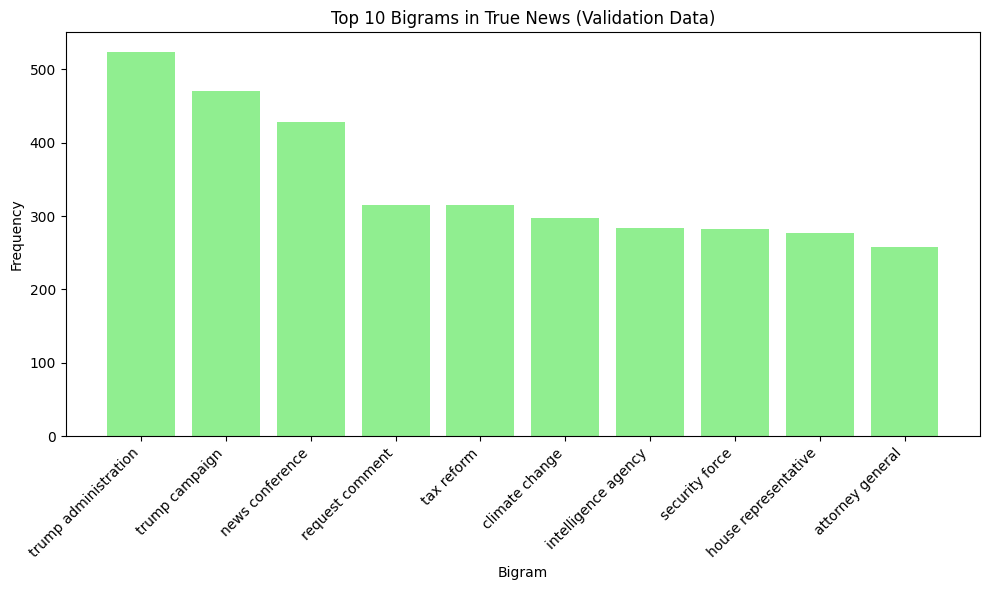

In [ ]:
## Print the top 10 bigrams by frequency in true news and plot the same using a bar graph

# Filter for true news in validation data and get the lemmatized text
true_news_corpus_val = val_df[val_df['news_label'] == 1]['lemmatized_text'].tolist()

# Get the top 10 bigrams for validation true news
top_bigrams_true_val = get_top_ngrams(true_news_corpus_val, ngram_range=(2, 2), n=10)

# Print the top bigrams
print("Top 10 Bigrams in True News (Validation Data):")
for ngram, freq in top_bigrams_true_val:
    print(f"{ngram}: {freq}")

# Prepare data for plotting
ngrams, frequencies = zip(*top_bigrams_true_val)

# Create the bar graph
plt.figure(figsize=(10, 6))
plt.bar(ngrams, frequencies, color='lightgreen')
plt.xlabel('Bigram')
plt.ylabel('Frequency')
plt.title('Top 10 Bigrams in True News (Validation Data)')
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

##### 5.3.5 Display the top 10 trigrams by frequency in true news and plot them as a bar graph

Top 10 Trigrams in True News (Validation Data):
official condition anonymity: 100
candidate donald trump: 80
tax rate percent: 76
trump transition team: 68
article sap editorial: 58
editorial staff sap: 58
involvement creation production: 58
sap editorial staff: 58
sap involvement creation: 58
staff sap involvement: 58


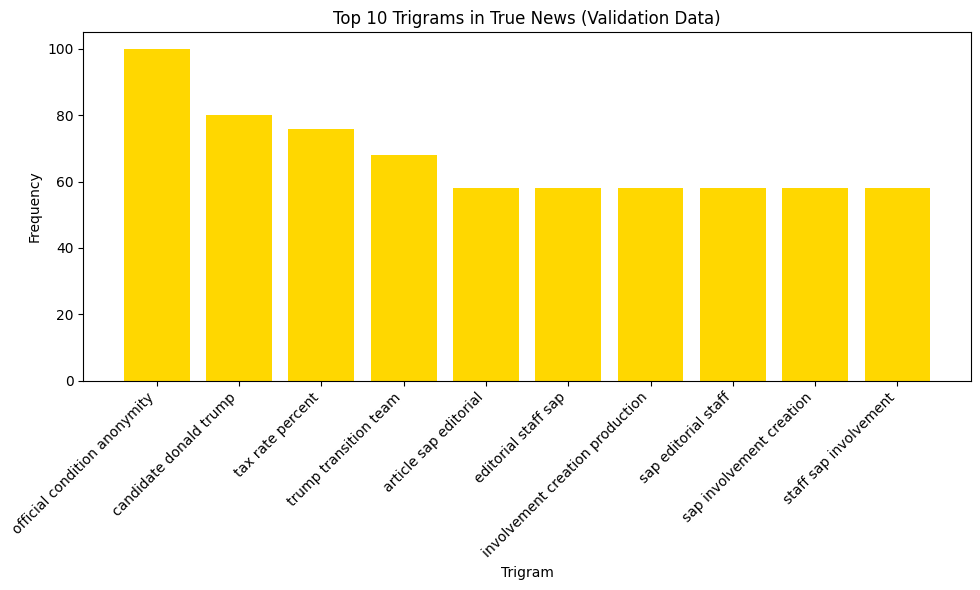

In [ ]:
## Print the top 10 trigrams by frequency in true news and plot the same using a bar graph

# Filter for true news in validation data and get the lemmatized text
true_news_corpus_val = val_df[val_df['news_label'] == 1]['lemmatized_text'].tolist()

# Get the top 10 trigrams for validation true news
top_trigrams_true_val = get_top_ngrams(true_news_corpus_val, ngram_range=(3, 3), n=10)

# Print the top trigrams
print("Top 10 Trigrams in True News (Validation Data):")
for ngram, freq in top_trigrams_true_val:
    print(f"{ngram}: {freq}")

# Prepare data for plotting
ngrams, frequencies = zip(*top_trigrams_true_val)

# Create the bar graph
plt.figure(figsize=(10, 6))
plt.bar(ngrams, frequencies, color='gold')
plt.xlabel('Trigram')
plt.ylabel('Frequency')
plt.title('Top 10 Trigrams in True News (Validation Data)')
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

### For Fake News

##### 5.3.6 Display the top 10 unigrams by frequency in fake news and plot them as a bar graph

Top 10 Unigrams in Fake News (Validation Data):
trump: 17746
people: 8025
president: 4936
time: 4788
year: 4564
image: 4132
state: 4013
video: 3573
campaign: 3460
news: 3388


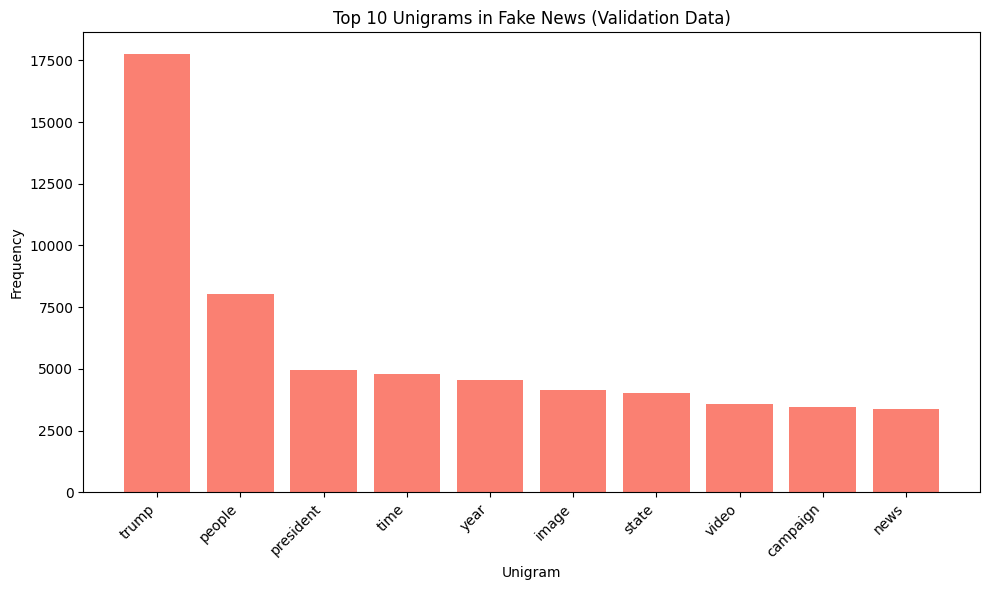

In [ ]:
## Print the top 10 unigrams by frequency in fake news and plot the same using a bar graph

# Filter for fake news in validation data and get the lemmatized text
fake_news_corpus_val = val_df[val_df['news_label'] == 0]['lemmatized_text'].tolist()

# Get the top 10 unigrams for validation fake news
top_unigrams_fake_val = get_top_ngrams(fake_news_corpus_val, ngram_range=(1, 1), n=10)

# Print the top unigrams
print("Top 10 Unigrams in Fake News (Validation Data):")
for ngram, freq in top_unigrams_fake_val:
    print(f"{ngram}: {freq}")

# Prepare data for plotting
ngrams, frequencies = zip(*top_unigrams_fake_val)

# Create the bar graph
plt.figure(figsize=(10, 6))
plt.bar(ngrams, frequencies, color='salmon') # Using a distinct color for fake news
plt.xlabel('Unigram')
plt.ylabel('Frequency')
plt.title('Top 10 Unigrams in Fake News (Validation Data)')
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

##### 5.3.7 Display the top 10 bigrams by frequency in fake news and plot them as a bar graph

Top 10 Bigrams in Fake News (Validation Data):
trump supporter: 674
trump campaign: 574
president trump: 562
century wire: 542
image image: 537
police officer: 516
law enforcement: 469
donald trump: 424
screen capture: 397
trump administration: 313


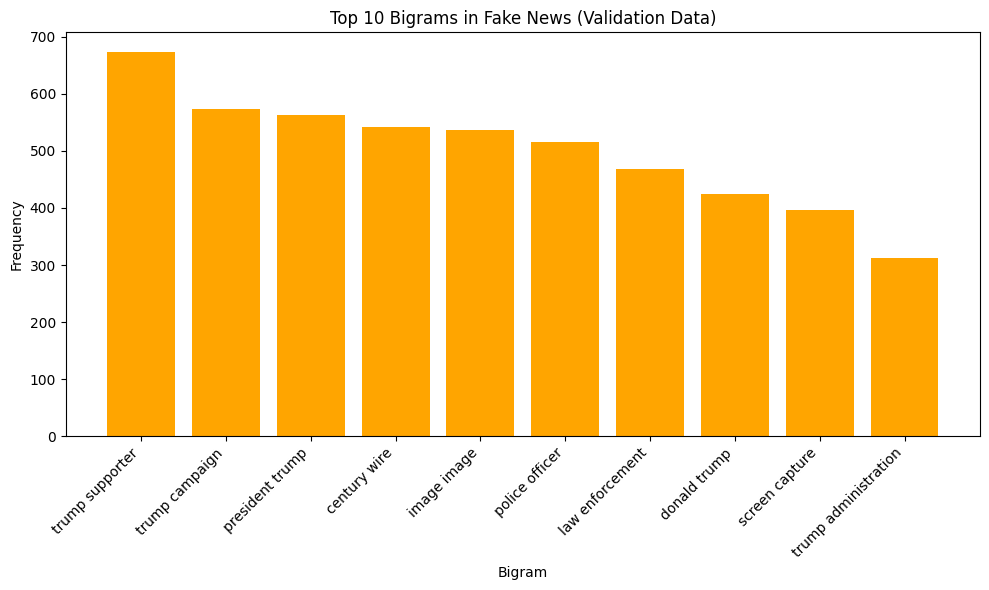

In [ ]:
## Print the top 10 bigrams by frequency in fake news and plot the same using a bar graph

# Filter for fake news in validation data and get the lemmatized text
fake_news_corpus_val = val_df[val_df['news_label'] == 0]['lemmatized_text'].tolist()

# Get the top 10 bigrams for validation fake news
top_bigrams_fake_val = get_top_ngrams(fake_news_corpus_val, ngram_range=(2, 2), n=10)

# Print the top bigrams
print("Top 10 Bigrams in Fake News (Validation Data):")
for ngram, freq in top_bigrams_fake_val:
    print(f"{ngram}: {freq}")

# Prepare data for plotting
ngrams, frequencies = zip(*top_bigrams_fake_val)

# Create the bar graph
plt.figure(figsize=(10, 6))
plt.bar(ngrams, frequencies, color='orange') # Using a different color for distinction
plt.xlabel('Bigram')
plt.ylabel('Frequency')
plt.title('Top 10 Bigrams in Fake News (Validation Data)')
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

##### 5.3.8 Display the top 10 trigrams by frequency in fake news and plot them as a bar graph

Top 10 Trigrams in Fake News (Validation Data):
news century wire: 280
video screen capture: 203
image video screen: 192
image screen capture: 144
image getty image: 134
filessupport subscribe member: 106
century wire filessupport: 93
century wire file: 73
image chip image: 70
image video screenshot: 67


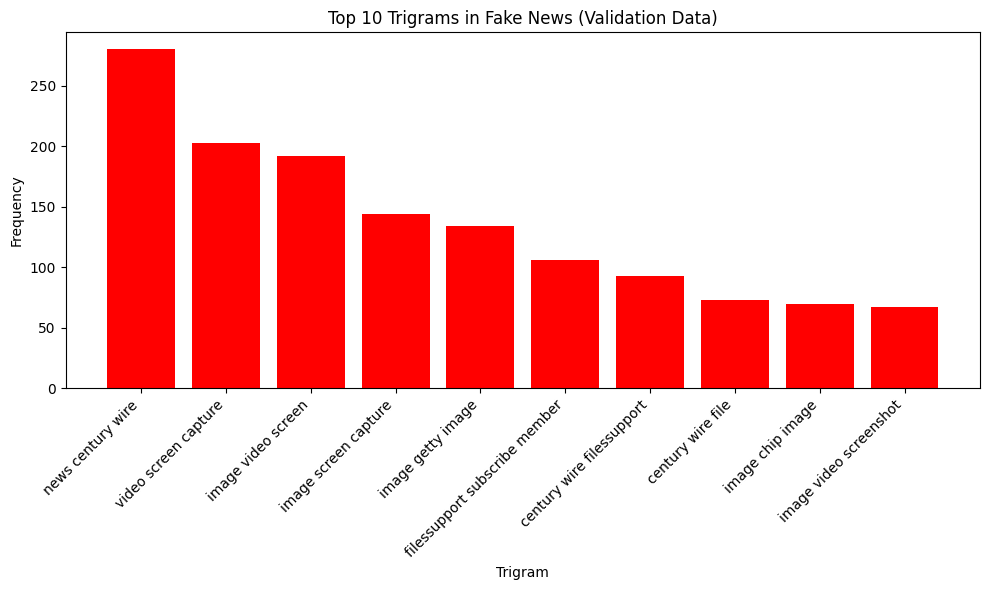

In [ ]:
## Print the top 10 trigrams by frequency in fake news and plot the same using a bar graph

# Filter for fake news in validation data and get the lemmatized text
fake_news_corpus_val = val_df[val_df['news_label'] == 0]['lemmatized_text'].tolist()

# Get the top 10 trigrams for validation fake news
top_trigrams_fake_val = get_top_ngrams(fake_news_corpus_val, ngram_range=(3, 3), n=10)

# Print the top trigrams
print("Top 10 Trigrams in Fake News (Validation Data):")
for ngram, freq in top_trigrams_fake_val:
    print(f"{ngram}: {freq}")

# Prepare data for plotting
ngrams, frequencies = zip(*top_trigrams_fake_val)

# Create the bar graph
plt.figure(figsize=(10, 6))
plt.bar(ngrams, frequencies, color='red') # Using a distinct color for fake news trigrams
plt.xlabel('Trigram')
plt.ylabel('Frequency')
plt.title('Top 10 Trigrams in Fake News (Validation Data)')
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

## **6.** Feature Extraction  <font color = red>[10 marks]</font> <br>

For any ML model to perform classification on textual data, you need to convert it to a vector form. In this assignment, you will use the Word2Vec Vectorizer to create vectors from textual data. Word2Vec model captures the semantic relationship between words.


### **6.1** Initialise Word2Vec model  <font color = red>[2 marks]</font>

In [ ]:
# Force reinstallation of numpy and gensim to ensure compatibility
!pip install numpy --upgrade --force-reinstall
!pip install gensim --upgrade --force-reinstall

# Import gensim.downloader after reinstallation
import gensim.downloader as api

# Download the pre-trained Word2Vec model
# This can take a while and requires a stable internet connection
print("Downloading Word2Vec model...")
try:
    word2vec_model = api.load("word2vec-google-news-300")
    print("Word2Vec model downloaded and loaded successfully.")
except Exception as e:
    print(f"Error loading Word2Vec model: {e}")
    word2vec_model = None # Set to None if loading fails

  Using cached numpy-2.3.1-cp311-cp311-manylinux_2_28_x86_64.whl.metadata (62 kB)
Using cached numpy-2.3.1-cp311-cp311-manylinux_2_28_x86_64.whl (16.9 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scipy 1.13.1 requires numpy<2.3,>=1.22.4, but you have numpy 2.3.1 which is incompatible.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.3.1 which is incompatible.
numba 0.61.2 requires numpy<2.3,>=1.24, but you have numpy 2.3.1 which is incompatible.


  Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.1 kB)
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached scipy-1.13.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
  Using cached smart_open-7.1.0-py3-none-any.whl.metadata (24 kB)
  Using cached wrapt-1.17.2-cp311-cp311-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.4 kB)
Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.7 MB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
Using cached scipy-1.13.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (38.6 MB)
Using cached smart_open-7.1.0-py3-none-any.whl (61 kB)
Using cached wrapt-1.17.2-cp311-cp311-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (83 kB)
  Att

Word2Vec model downloaded and loaded successfully.


### **6.2** Extract vectors for cleaned news data   <font color = red>[8 marks]</font>

In [ ]:
## Write your code here to extract the vectors from the Word2Vec model for both training and validation data
# Import numpy for array operations
import numpy as np

def document_vector(doc, model):
    """
    Calculates the average Word2Vec vector for a given document.

    Args:
        doc (str): The input document string.
        model: The loaded Word2Vec model.

    Returns:
        numpy.ndarray: The average vector for the document, or a zero vector
                       if no words in the document are in the model's vocabulary.
    """
    # Split the document into words (assuming space-separated words after preprocessing)
    words = doc.split()

    # Get vectors for words present in the model's vocabulary
    vectors = [model[word] for word in words if word in model.key_to_index]

    # Calculate the mean vector
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        # Return a zero vector of the same dimension if no words are in the vocabulary
        # The dimension is determined by the loaded model (e.g., 300 for google-news)
        return np.zeros(model.vector_size)

# Check if the model was loaded successfully before extracting vectors
if word2vec_model is not None:
    print("Extracting vectors for training data...")
    # Apply the function to the lemmatized text in the training data
    # Use tqdm for a progress bar
    train_vectors = np.vstack(train_df['lemmatized_text'].progress_apply(lambda x: document_vector(x, word2vec_model)))
    print("Training vectors shape:", train_vectors.shape)

    print("\nExtracting vectors for validation data...")
    # Apply the function to the lemmatized text in the validation data
    # Use tqdm for a progress bar
    val_vectors = np.vstack(val_df['lemmatized_text'].progress_apply(lambda x: document_vector(x, word2vec_model)))
    print("Validation vectors shape:", val_vectors.shape)

    ## Extract the target variable for the training data and validation data
    y_train = train_df['news_label']
    y_val = val_df['news_label']

    print("\nTarget variable extracted.")
    print("Training target shape:", y_train.shape)
    print("Validation target shape:", y_val.shape)

else:
    print("Word2Vec model was not loaded successfully. Cannot extract vectors.")


Extracting vectors for training data...


  0%|          | 0/31428 [00:00<?, ?it/s]

Training vectors shape: (31428, 300)

Extracting vectors for validation data...


  0%|          | 0/13470 [00:00<?, ?it/s]

Validation vectors shape: (13470, 300)

Target variable extracted.
Training target shape: (31428,)
Validation target shape: (13470,)


## **7.** Model Training and Evaluation <font color = red>[45 marks]</font>

You will use a set of supervised models to classify the news into true or fake.

### **7.0** Import models and evaluation metrics

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

### **7.1** Build Logistic Regression Model  <font color = red>[15 marks]</font>

##### 7.1.1 Create and train logistic regression model on training data  <font color = red>[10 marks]</font>

In [ ]:
## Initialise Logistic Regression model
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
# Using default parameters for now, but these can be tuned later
logreg_model = LogisticRegression(random_state=42, solver='liblinear') # Use 'liblinear' solver for smaller datasets or L1/L2 penalty

## Train Logistic Regression model on training data
print("Training Logistic Regression model...")
if 'train_vectors' in locals() and 'y_train' in locals() and train_vectors is not None:
    logreg_model.fit(train_vectors, y_train)
    print("Model training complete.")
else:
    print("Training data or labels not available. Cannot train the model.")
    logreg_model = None # Set model to None if training data is missing

## Predict on validation data
if logreg_model is not None and 'val_vectors' in locals() and val_vectors is not None:
    print("Making predictions on validation data...")
    y_pred_val = logreg_model.predict(val_vectors)
    print("Predictions complete.")
else:
    print("Model not trained or validation data not available. Cannot make predictions.")
    y_pred_val = None # Set predictions to None if validation data is missing


Training Logistic Regression model...
Model training complete.
Making predictions on validation data...
Predictions complete.


##### 7.1.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [ ]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels

# Import accuracy, precision, recall, f_score from sklearn to predict train accuracy
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

if 'y_val' in locals() and 'y_pred_val' in locals() and y_val is not None and y_pred_val is not None:
    # Calculate Accuracy
    accuracy = accuracy_score(y_val, y_pred_val)
    print(f"Accuracy: {accuracy:.4f}")

    # Calculate Precision
    precision = precision_score(y_val, y_pred_val)
    print(f"Precision: {precision:.4f}")

    # Calculate Recall
    recall = recall_score(y_val, y_pred_val)
    print(f"Recall: {recall:.4f}")

    # Calculate F1-score
    f1 = f1_score(y_val, y_pred_val)
    print(f"F1-score: {f1:.4f}")
else:
    print("Validation labels or predictions not available. Cannot calculate metrics.")

Accuracy: 0.9065
Precision: 0.8986
Recall: 0.9063
F1-score: 0.9024


In [ ]:
# Classification Report
from sklearn.metrics import classification_report

if 'y_val' in locals() and 'y_pred_val' in locals() and y_val is not None and y_pred_val is not None:
    print("\nClassification Report:")
    print(classification_report(y_val, y_pred_val))
else:
    print("Validation labels or predictions not available. Cannot generate classification report.")


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      7045
           1       0.90      0.91      0.90      6425

    accuracy                           0.91     13470
   macro avg       0.91      0.91      0.91     13470
weighted avg       0.91      0.91      0.91     13470



### **7.2** Build Decision Tree Model <font color = red>[15 marks]</font>

##### 7.2.1 Create and train a decision tree model on training data <font color = red>[10 marks]</font>

In [ ]:
## Initialise Decision Tree model

from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree model
# Using default parameters initially
dt_model = DecisionTreeClassifier(random_state=42)

## Train Decision Tree model on training data
print("Training Decision Tree model...")
if 'train_vectors' in locals() and 'y_train' in locals() and train_vectors is not None:
    dt_model.fit(train_vectors, y_train)
    print("Decision Tree model training complete.")
else:
    print("Training data or labels not available. Cannot train the Decision Tree model.")
    dt_model = None # Set model to None if training data is missing

## Predict on validation data
if dt_model is not None and 'val_vectors' in locals() and val_vectors is not None:
    print("Making predictions on validation data using Decision Tree...")
    y_pred_val_dt = dt_model.predict(val_vectors)
    print("Decision Tree predictions complete.")
else:
    print("Decision Tree model not trained or validation data not available. Cannot make predictions.")
    y_pred_val_dt = None # Set predictions to None if validation data is missing

Training Decision Tree model...
Decision Tree model training complete.
Making predictions on validation data using Decision Tree...
Decision Tree predictions complete.


##### 7.2.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [ ]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels

# Ensure metric functions are imported (already done earlier but good to be explicit)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

if 'y_val' in locals() and 'y_pred_val_dt' in locals() and y_val is not None and y_pred_val_dt is not None:
    print("\nDecision Tree Model Metrics:")
    # Calculate Accuracy
    accuracy_dt = accuracy_score(y_val, y_pred_val_dt)
    print(f"Accuracy: {accuracy_dt:.4f}")

    # Calculate Precision
    precision_dt = precision_score(y_val, y_pred_val_dt)
    print(f"Precision: {precision_dt:.4f}")

    # Calculate Recall
    recall_dt = recall_score(y_val, y_pred_val_dt)
    print(f"Recall: {recall_dt:.4f}")

    # Calculate F1-score
    f1_dt = f1_score(y_val, y_pred_val_dt)
    print(f"F1-score: {f1_dt:.4f}")
else:
    print("Validation labels or Decision Tree predictions not available. Cannot calculate metrics.")


Decision Tree Model Metrics:
Accuracy: 0.8223
Precision: 0.8293
Recall: 0.7900
F1-score: 0.8092


In [ ]:
# Classification Report
from sklearn.metrics import classification_report

if 'y_val' in locals() and 'y_pred_val_dt' in locals() and y_val is not None and y_pred_val_dt is not None:
    print("\nDecision Tree Classification Report:")
    print(classification_report(y_val, y_pred_val_dt))
else:
    print("Validation labels or Decision Tree predictions not available. Cannot generate classification report.")


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.85      0.83      7045
           1       0.83      0.79      0.81      6425

    accuracy                           0.82     13470
   macro avg       0.82      0.82      0.82     13470
weighted avg       0.82      0.82      0.82     13470



### **7.3** Build Random Forest Model <font color = red>[15 marks]</font>


##### 7.3.1 Create and train a random forest model on training data <font color = red>[10 marks]</font>

In [ ]:
## Initialise Random Forest model
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
# Using default parameters initially
rf_model = RandomForestClassifier(random_state=42)

## Train Random Forest model on training data
print("Training Random Forest model...")
if 'train_vectors' in locals() and 'y_train' in locals() and train_vectors is not None:
    rf_model.fit(train_vectors, y_train)
    print("Random Forest model training complete.")
else:
    print("Training data or labels not available. Cannot train the Random Forest model.")
    rf_model = None # Set model to None if training data is missing


## Predict on validation data
if rf_model is not None and 'val_vectors' in locals() and val_vectors is not None:
    print("Making predictions on validation data using Random Forest...")
    y_pred_val_rf = rf_model.predict(val_vectors)
    print("Random Forest predictions complete.")
else:
    print("Random Forest model not trained or validation data not available. Cannot make predictions.")
    y_pred_val_rf = None # Set predictions to None if validation data is missing


Training Random Forest model...
Random Forest model training complete.
Making predictions on validation data using Random Forest...
Random Forest predictions complete.


 ##### 7.3.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [ ]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels

# Ensure metric functions are imported (already done earlier but good to be explicit)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

if 'y_val' in locals() and 'y_pred_val_rf' in locals() and y_val is not None and y_pred_val_rf is not None:
    print("\nRandom Forest Model Metrics:")
    # Calculate Accuracy
    accuracy_rf = accuracy_score(y_val, y_pred_val_rf)
    print(f"Accuracy: {accuracy_rf:.4f}")

    # Calculate Precision
    precision_rf = precision_score(y_val, y_pred_val_rf)
    print(f"Precision: {precision_rf:.4f}")

    # Calculate Recall
    recall_rf = recall_score(y_val, y_pred_val_rf)
    print(f"Recall: {recall_rf:.4f}")

    # Calculate F1-score
    f1_rf = f1_score(y_val, y_pred_val_rf)
    print(f"F1-score: {f1_rf:.4f}")
else:
    print("Validation labels or Random Forest predictions not available. Cannot calculate metrics.")


Random Forest Model Metrics:
Accuracy: 0.9085
Precision: 0.9113
Recall: 0.8953
F1-score: 0.9032


In [ ]:
# Classification Report
from sklearn.metrics import classification_report

if 'y_val' in locals() and 'y_pred_val_rf' in locals() and y_val is not None and y_pred_val_rf is not None:
    print("\nRandom Forest Classification Report:")
    print(classification_report(y_val, y_pred_val_rf))
else:
    print("Validation labels or Random Forest predictions not available. Cannot generate classification report.")


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.92      0.91      7045
           1       0.91      0.90      0.90      6425

    accuracy                           0.91     13470
   macro avg       0.91      0.91      0.91     13470
weighted avg       0.91      0.91      0.91     13470



## **8.** Conclusion <font color = red>[5 marks]</font>

Summarise your findings by discussing patterns observed in true and fake news and how semantic classification addressed the problem. Highlight the best model chosen, the evaluation metric prioritised for the decision, and assess the approach and its impact.

Assessment of the Approach:

    Strengths:
        Semantic Understanding: Using Word2Vec allows the model to go beyond simple word matching and potentially capture the underlying themes and meaning, which is crucial for discerning complex text like news.
        Reduced Sparsity: Word embeddings create dense vector representations, which can be more computationally efficient and effective for some models compared to highly sparse bag-of-words representations.
        Generalization: Word2Vec models trained on large corpora can capture general language patterns, allowing the model to understand words not explicitly seen in the training data but related to words it has seen.
    Weaknesses:
      Loss of Word Order: The document vector approach used here (averaging word vectors) discards the sequence information of words, which can be important for understanding context and sentiment.
      Single Vector per Word: Basic Word2Vec assigns one vector per word, failing to capture different meanings of polysemous words (e.g., "bank" as a financial institution vs. river bank).
            Computational Cost: Training or loading large pre-trained Word2Vec models and generating document vectors can be computationally intensive.
Dependency on Pre-training Data: The quality of the embeddings depends heavily on the data the Word2Vec model was trained on.
Filtering by POS: While keeping only nouns might focus on key entities and topics, it might lose important information conveyed by verbs, adjectives, or adverbs, which could be indicative of fake news (e.g., sensationalist adjectives).
If successful, a semantic classification model for fake news detection could have a significant positive impact:
**Reduce Misinformation Spread:** By automatically identifying and flagging fake news, such a system can help platforms (like social media, news aggregators) limit its dissemination.
** Improve Information Literacy:** By highlighting potentially fake content, users are encouraged to be more critical of the information they consume.
**Support Content Moderation: **Provides an automated tool to assist human moderators in dealing with the massive volume of online content.
**Protect Public Trust**: Helps maintain the credibility of legitimate news sources by reducing the noise from fake content.

 The effectiveness of this specific approach (Word2Vec + averaging) would ultimately depend on how well the generated document vectors capture the subtle semantic differences between true and fake news, and how well the chosen classification model can learn to separate these representations. More advanced techniques like using sentence embeddings (e.g., from models like BERT, Sentence-BERT) or incorporating sequence models (like LSTMs or Transformers) might capture semantic meaning and context more effectively. However, Word2Vec provides a solid foundational approach to incorporating semantic information into text classification.